In [39]:
%cd ..

/Users/datvodinh/Documents/Github


### Import Library

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pickle
import warnings
warnings.filterwarnings('ignore')

### Set plot Style

In [41]:
sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=16)     # fontsize of the axes title
plt.rc('axes', labelsize=12)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)    # fontsize of the tick labels
plt.rc('legend', fontsize=10)    # legend fontsize
plt.rc('font', size=10)

# 1. Data Overview

In [42]:
data = pd.read_csv("./data/merged_data.csv")

FileNotFoundError: [Errno 2] No such file or directory: './data/merged_data.csv'

### 1.1 Show Info

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        981 non-null    object 
 1   CPU manufacturer    981 non-null    object 
 2   CPU brand modifier  972 non-null    float64
 3   CPU generation      967 non-null    float64
 4   CPU Speed (GHz)     954 non-null    float64
 5   RAM (GB)            980 non-null    float64
 6   RAM Type            961 non-null    object 
 7   Bus (MHz)           872 non-null    float64
 8   Storage (GB)        979 non-null    float64
 9   Screen Size (inch)  978 non-null    float64
 10  Screen Resolution   925 non-null    object 
 11  Refresh Rate (Hz)   969 non-null    float64
 12  GPU manufacturer    979 non-null    object 
 13  Weight (kg)         954 non-null    float64
 14  Battery             869 non-null    float64
 15  Price (VND)         916 non-null    float64
dtypes: float

In [ ]:
data.head(3)

,Manufacturer,CPU manufacturer,CPU brand modifier,CPU generation,CPU Speed (GHz),RAM (GB),RAM Type,Bus (MHz),Storage (GB),Screen Size (inch),Screen Resolution,Refresh Rate (Hz),GPU manufacturer,Weight (kg),Battery,Price (VND)
0,asus,AMD,3.0,7.0,4.1,8.0,LPDDR5,5500.0,256.0,15.0,1920x1080,60.0,Intel,1.8,42.0,8990000.0
1,asus,Intel,5.0,11.0,4.5,16.0,DDR4,3200.0,512.0,15.0,1920x1080,144.0,NVIDIA,2.3,42.0,17990000.0
2,asus,Intel,5.0,12.0,4.5,16.0,DDR4,3200.0,512.0,15.0,1920x1080,144.0,Intel,2.2,NaN,20490000.0


### 1.2 Remove Duplicate

In [ ]:
# remove duplicates row and row where price is nan
data.drop_duplicates(inplace=True)
data.dropna(subset=['Price (VND)'], axis=0, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 865 entries, 0 to 979
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        865 non-null    object 
 1   CPU manufacturer    865 non-null    object 
 2   CPU brand modifier  858 non-null    float64
 3   CPU generation      853 non-null    float64
 4   CPU Speed (GHz)     839 non-null    float64
 5   RAM (GB)            864 non-null    float64
 6   RAM Type            846 non-null    object 
 7   Bus (MHz)           766 non-null    float64
 8   Storage (GB)        863 non-null    float64
 9   Screen Size (inch)  862 non-null    float64
 10  Screen Resolution   819 non-null    object 
 11  Refresh Rate (Hz)   853 non-null    float64
 12  GPU manufacturer    864 non-null    object 
 13  Weight (kg)         842 non-null    float64
 14  Battery             760 non-null    float64
 15  Price (VND)         865 non-null    float64
dtypes: float64(11

# 2. Exploratory Data Analysis (EDA)

In [ ]:
features_data = data.drop('Price (VND)',axis=1)
price_data = data['Price (VND)']

### 2.1 Check Null Variable

<Axes: >

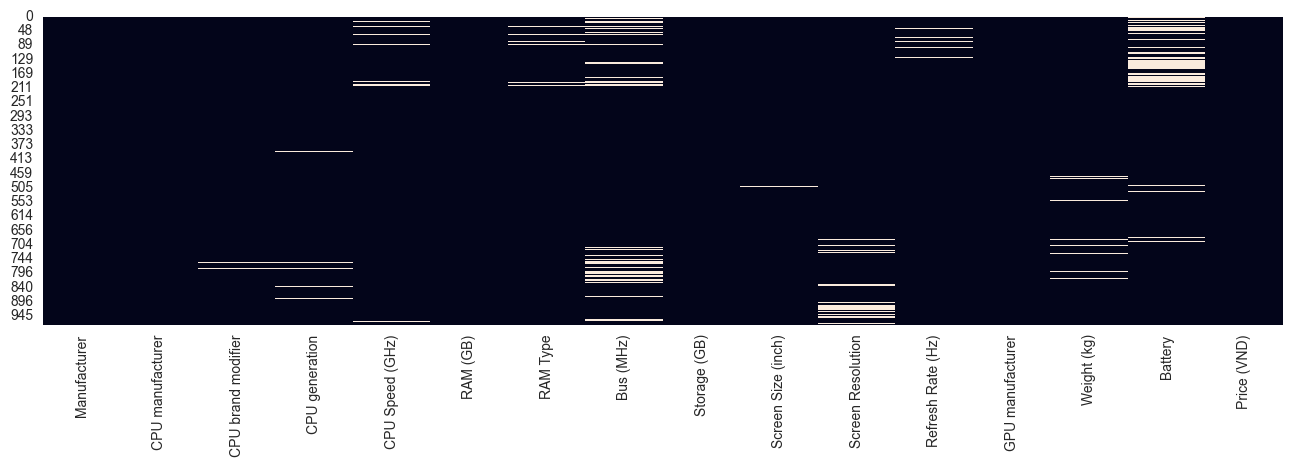

In [ ]:
plt.figure(figsize=(16, 4))
sns.heatmap(data.isnull(), cbar= False, fmt='.0f')

### 2.2 Numerical features

In [ ]:
numerical_features=[col for col in features_data.columns if features_data[col].dtype!='O']
numerical_features

['CPU brand modifier',
 'CPU generation',
 'CPU Speed (GHz)',
 'RAM (GB)',
 'Bus (MHz)',
 'Storage (GB)',
 'Screen Size (inch)',
 'Refresh Rate (Hz)',
 'Weight (kg)',
 'Battery']

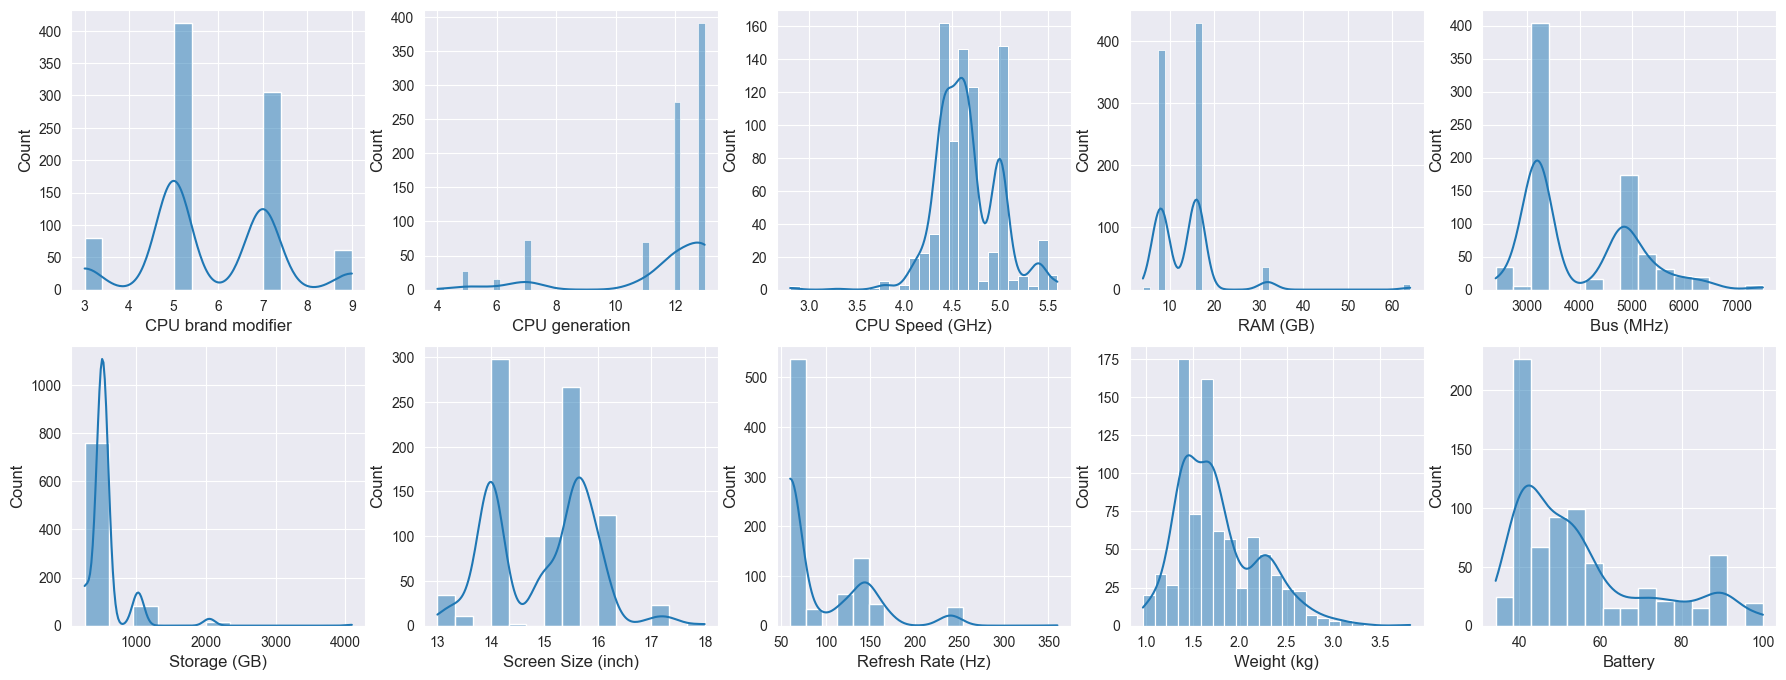

In [ ]:
fig, ax = plt.subplots(2,5, figsize=(22,8))
for i in range(len(numerical_features)):
    row,cols = divmod(i, 5)
    sns.histplot(features_data[numerical_features[i]], kde=True, ax=ax[row, cols])
plt.show()

#### Correlation Matrix

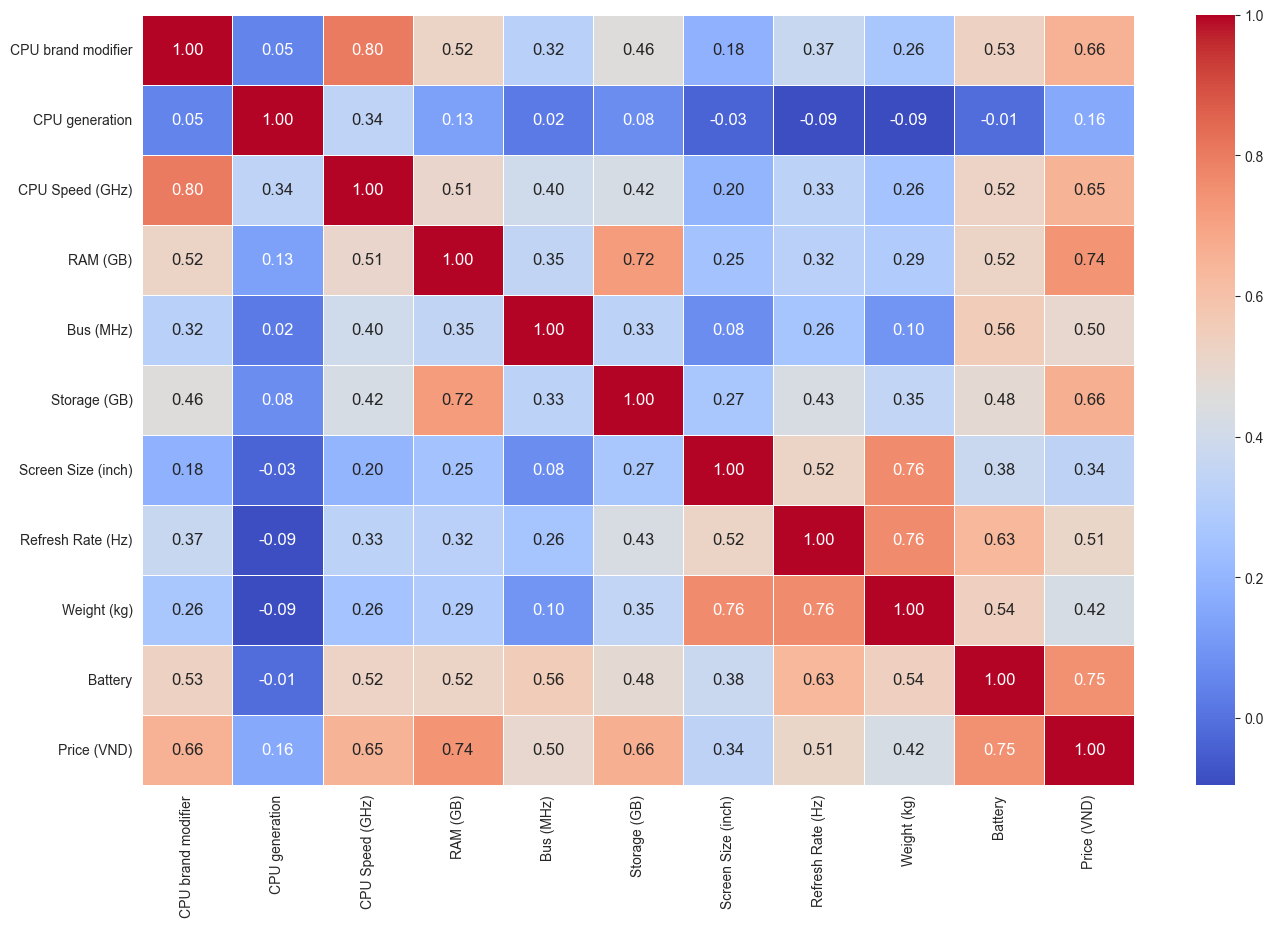

In [ ]:
corr_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(16,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            linewidths=0.5, annot_kws={"size": 12})
plt.show()

### 2.3 Categorical Features

In [ ]:
categorical_features=[col for col in features_data.columns if features_data[col].dtype=='O']
categorical_features

['Manufacturer',
 'CPU manufacturer',
 'RAM Type',
 'Screen Resolution',
 'GPU manufacturer']

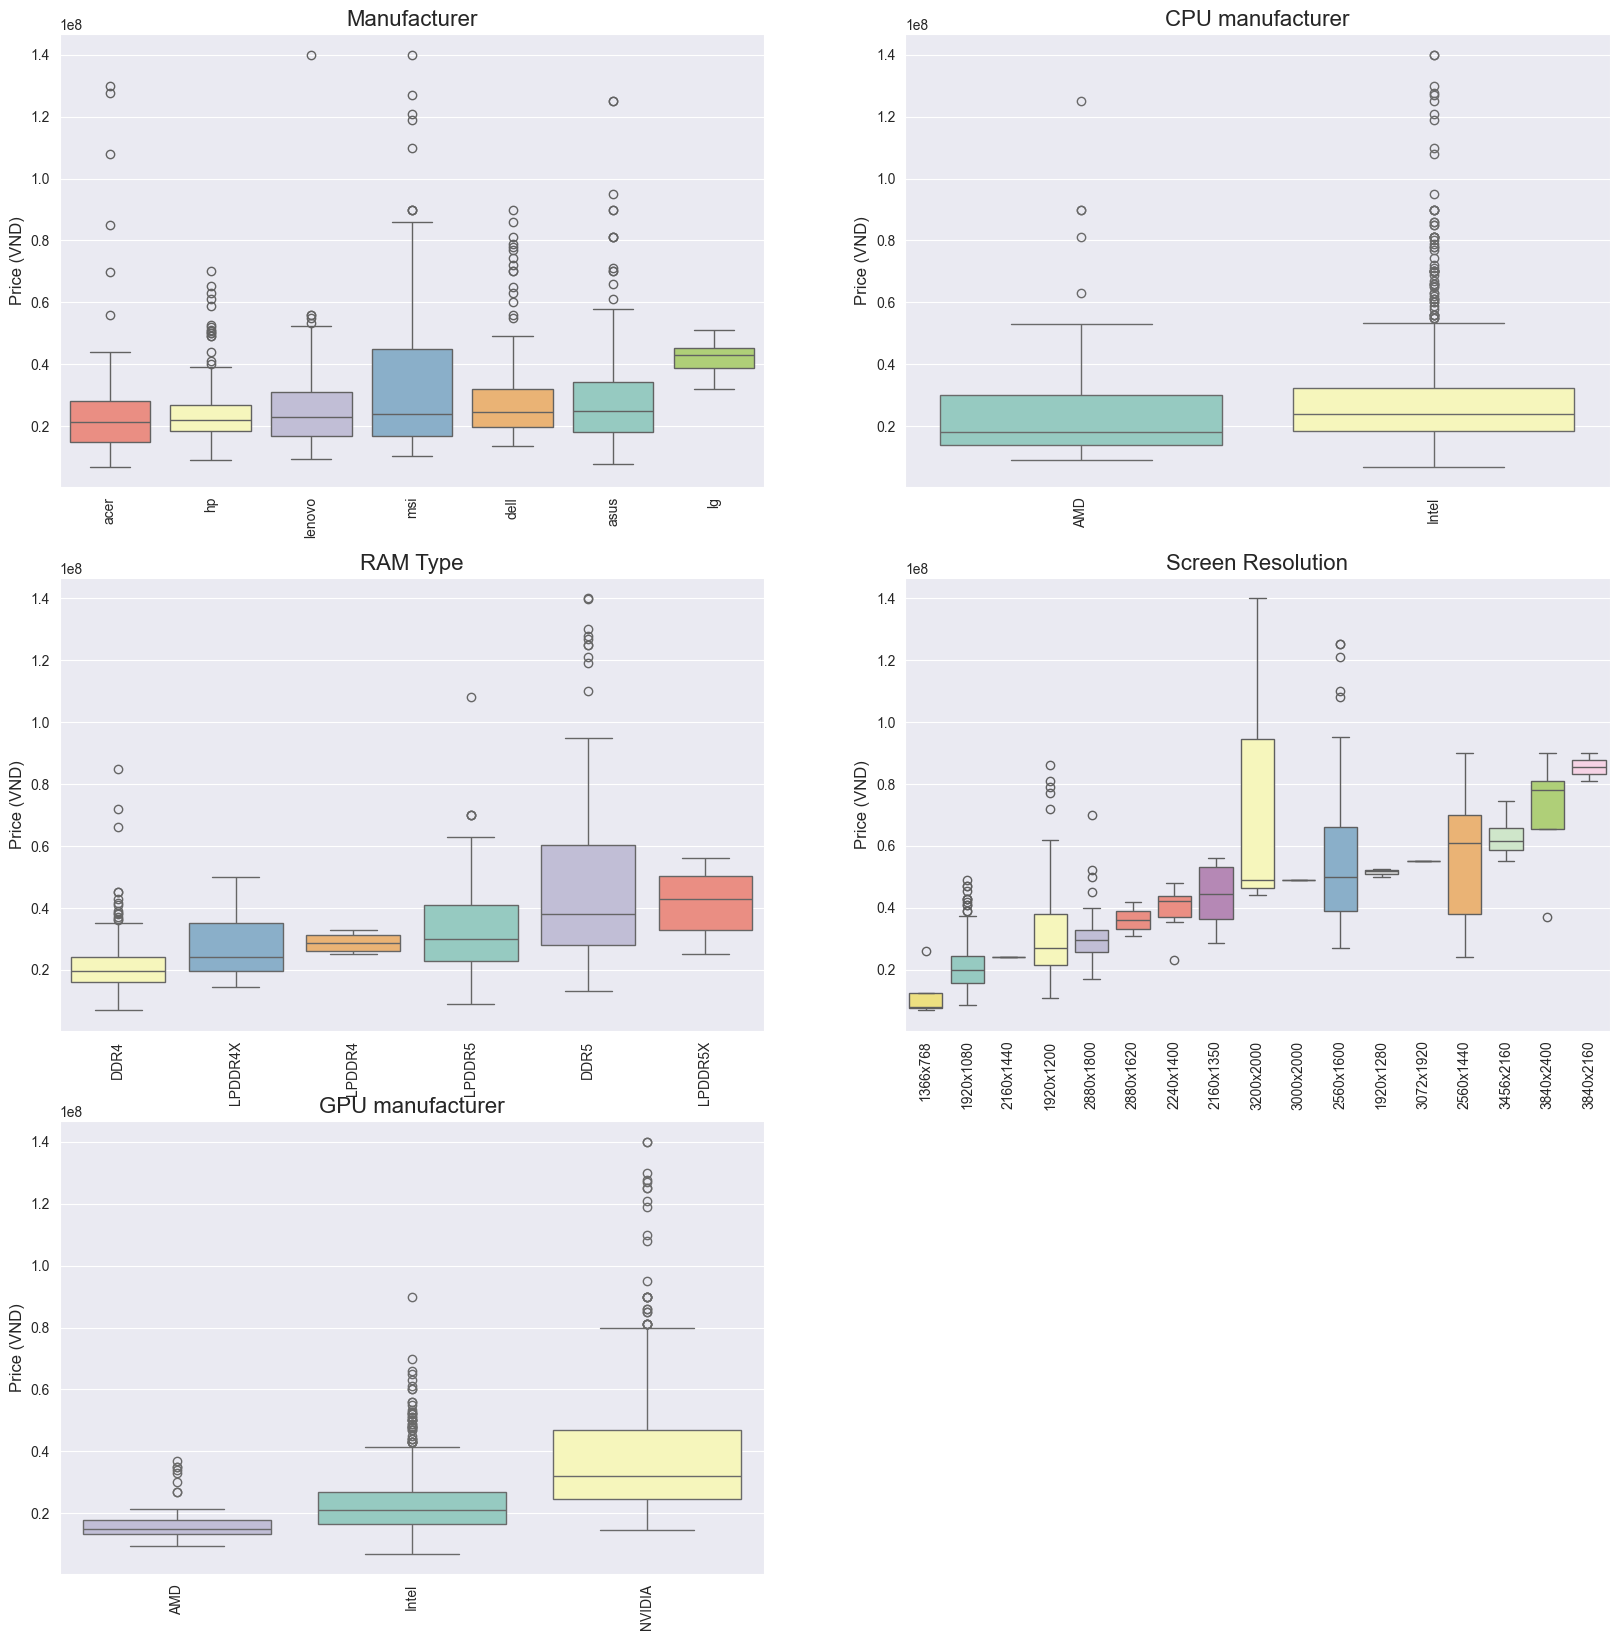

In [ ]:
plt.figure(figsize=(20,20))
for i in range(len(categorical_features)):
    plt.subplot(3,2,i+1)
    plt.title(categorical_features[i])
    sns.boxplot(data=data, x=categorical_features[i], y="Price (VND)", palette="Set3", hue=categorical_features[i],legend=False,
                order=data['Price (VND)'].groupby(data[categorical_features[i]]).median().sort_values().index
                )
    plt.xticks(rotation=90)
    plt.xlabel('')

### 2.4 Price Histogram

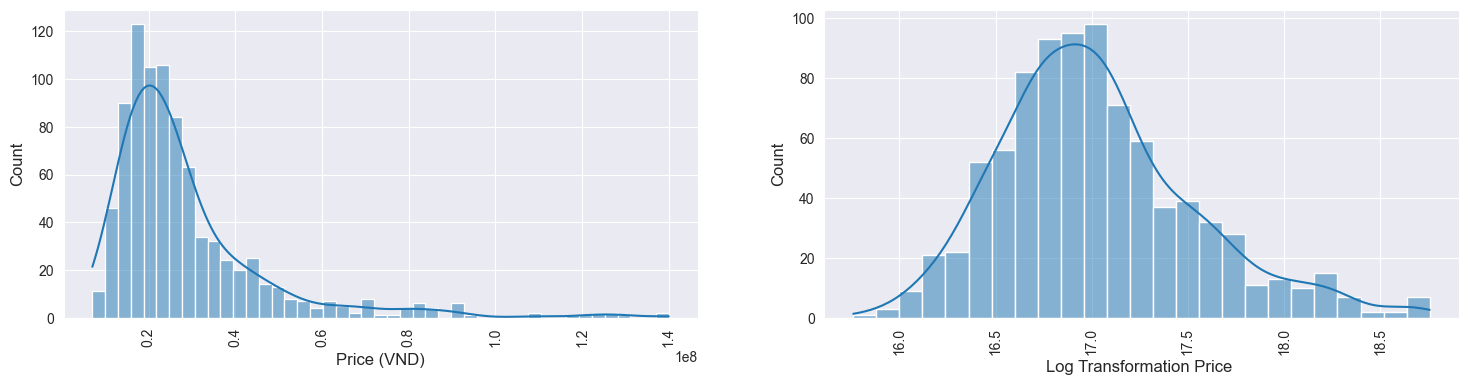

In [ ]:
plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
sns.histplot(data['Price (VND)'], kde=True)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.histplot(np.log(data['Price (VND)']), kde=True)
plt.xlabel('Log Transformation Price ')
plt.xticks(rotation=90)
plt.show()

# 3. Data PreProcessing

In [ ]:
process_data = data.copy()

### 3.1 Data Imputation

In [ ]:
# nan ratio
nan_ratio = process_data.isnull().sum() / len(process_data)
nan_ratio = nan_ratio[nan_ratio > 0]
nan_ratio.sort_values(inplace=True)
nan_ratio

RAM (GB)              0.001156
GPU manufacturer      0.001156
Storage (GB)          0.002312
Screen Size (inch)    0.003468
CPU brand modifier    0.008092
CPU generation        0.013873
Refresh Rate (Hz)     0.013873
RAM Type              0.021965
Weight (kg)           0.026590
CPU Speed (GHz)       0.030058
Screen Resolution     0.053179
Bus (MHz)             0.114451
Battery               0.121387
dtype: float64

#### Fill numerical features with median

In [ ]:
process_data["RAM (GB)"].fillna(process_data["RAM (GB)"].median(), inplace=True)
process_data["Storage (GB)"].fillna(process_data["Storage (GB)"].median(), inplace=True)
process_data["Screen Size (inch)"].fillna(process_data["Screen Size (inch)"].median(), inplace=True)
process_data["Refresh Rate (Hz)"].fillna(process_data["Refresh Rate (Hz)"].median(), inplace=True)
process_data["Weight (kg)"].fillna(process_data["Weight (kg)"].median(), inplace=True)
process_data["Bus (MHz)"].fillna(process_data["Bus (MHz)"].median(), inplace=True)
process_data["Battery"].fillna(process_data["Battery"].median(), inplace=True)
process_data["CPU Speed (GHz)"].fillna(process_data["CPU Speed (GHz)"].median(), inplace=True)

#### Fill Categorical features with probability

In [ ]:
def fil_nan_by_prob(df, col):
    prob = dict(df[col].value_counts(normalize=True))
    df[col].fillna(pd.Series(np.random.choice(list(prob.keys()), p=list(prob.values()), size=len(df))), inplace=True)

fil_nan_by_prob(process_data, 'RAM Type')
fil_nan_by_prob(process_data, 'GPU manufacturer')

#### Merge CPU manufacter and CPU generation and fill nan for all CPU's stat

In [ ]:
# calulate median of CPU's stat group by CPU manufacturer (AMD or Intel)
median_brand_modifier = process_data['CPU brand modifier'].groupby(process_data['CPU manufacturer']).median()
median_generation = process_data['CPU generation'].groupby(process_data['CPU manufacturer']).median()
median_speed = process_data['CPU Speed (GHz)'].groupby(process_data['CPU manufacturer']).median()

In [ ]:
# fill nan value of CPU's stat by median of CPU's stat group by CPU manufacturer
process_data['CPU brand modifier'].fillna(data['CPU manufacturer'].map(median_brand_modifier), inplace=True)
process_data['CPU generation'].fillna(data['CPU manufacturer'].map(median_generation), inplace=True)
process_data['CPU Speed (GHz)'].fillna(data['CPU manufacturer'].map(median_speed), inplace=True)

In [ ]:
process_data['CPU'] = process_data['CPU manufacturer'] + ' Gen ' + process_data['CPU generation'].astype(str) + "th"

In [ ]:
process_data.drop(columns=['CPU manufacturer', 'CPU generation'], axis=1, inplace=True)

#### Change Resolution to New Feature like 

In [ ]:
# with column Screen Resolution, extract 1 column is Screen Resolution (2k,4k) and ratio of screen
process_data['Screen Ratio'] = process_data['Screen Resolution'].str.split('x').str[0].astype(float) / process_data['Screen Resolution'].str.split('x').str[1].astype(float)

In [ ]:
def convert_resolution(resolution: str):
    if isinstance(resolution, str):
        w,h = resolution.split('x')
    else:
        return '1080p'
    if int(w) >= 3840:
        return '4k'
    elif int(w) >= 2880:
        return '3k'
    elif int(w) >= 2560:
        return '2k'
    elif int(w) >= 1920:
        return '1080p'
    elif int(w) >= 1366:
        return '720p'
    else:
        return '1080p'
process_data['Screen Resolution'] = process_data['Screen Resolution'].apply(convert_resolution)

In [ ]:
def convert_ratio(ratio: float):
    if ratio >= 1.7:
        return '16:9'
    elif ratio == 1.6:
        return '16:10'
    elif ratio == 1.5:
        return '3:2'
    else:
        return '16:9'
process_data['Screen Ratio'] = process_data['Screen Ratio'].apply(convert_ratio)

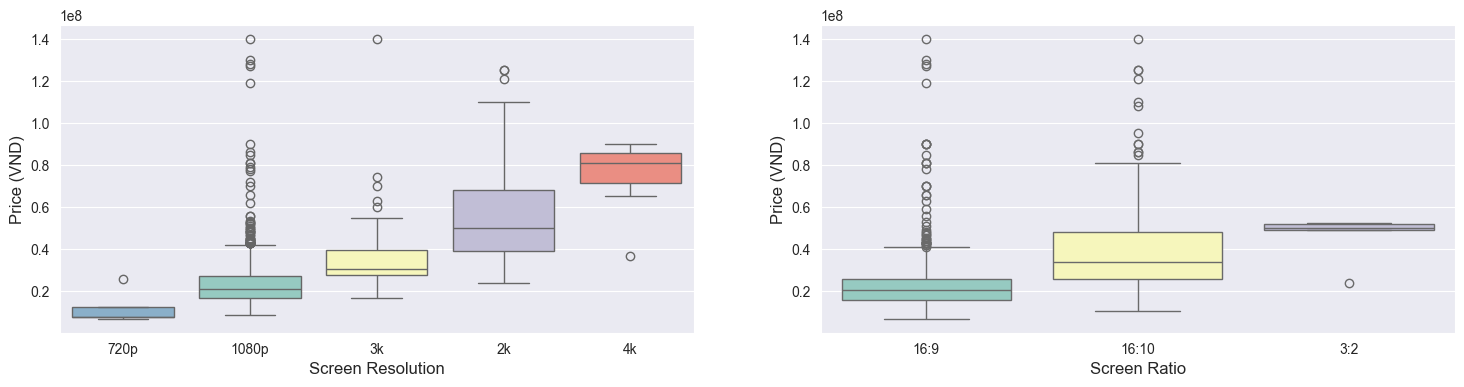

In [ ]:
# plot boxplot of Price (VND) group by Screen Resolution and Screen Ratio
plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
sns.boxplot(data=process_data, x='Screen Resolution', y="Price (VND)", palette="Set3", hue='Screen Resolution',legend=False,
            order=process_data['Price (VND)'].groupby(process_data['Screen Resolution']).median().sort_values().index
            )
plt.subplot(1,2,2)
sns.boxplot(data=process_data, x='Screen Ratio', y="Price (VND)", palette="Set3", hue='Screen Ratio',legend=False,
            order=process_data['Price (VND)'].groupby(process_data['Screen Ratio']).median().sort_values().index
            )
plt.show()

### 3.2 One Hot Encoding

In [ ]:
categorical_features = ['Manufacturer', 'CPU', 'RAM Type', "Screen Resolution","GPU manufacturer", "Screen Ratio"]

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# use one hot encoder for categorical features
ohe = OneHotEncoder(sparse=False)
ohe.fit(process_data[categorical_features])

OneHotEncoder(sparse=False, sparse_output=False)

In [ ]:
one_hot_data = pd.DataFrame(ohe.transform(process_data[categorical_features]), columns=ohe.get_feature_names_out())

In [ ]:
process_data.drop(columns=categorical_features, axis=1, inplace=True)

In [ ]:

process_data.reset_index(drop=True, inplace=True)

In [ ]:
one_hot_data.index

RangeIndex(start=0, stop=865, step=1)

In [ ]:
# concat one hot data and numerical data
final_data = pd.concat([process_data, one_hot_data], axis=1)

In [ ]:
final_data.isnull().sum()

CPU brand modifier         0
CPU Speed (GHz)            0
RAM (GB)                   0
Bus (MHz)                  0
Storage (GB)               0
Screen Size (inch)         0
Refresh Rate (Hz)          0
Weight (kg)                0
Battery                    0
Price (VND)                0
Manufacturer_acer          0
Manufacturer_asus          0
Manufacturer_dell          0
Manufacturer_hp            0
Manufacturer_lenovo        0
Manufacturer_lg            0
Manufacturer_msi           0
CPU_AMD Gen 4.0th          0
CPU_AMD Gen 5.0th          0
CPU_AMD Gen 6.0th          0
CPU_AMD Gen 7.0th          0
CPU_Intel Gen 11.0th       0
CPU_Intel Gen 12.0th       0
CPU_Intel Gen 13.0th       0
RAM Type_DDR4              0
RAM Type_DDR5              0
RAM Type_LPDDR4            0
RAM Type_LPDDR4X           0
RAM Type_LPDDR5            0
RAM Type_LPDDR5X           0
Screen Resolution_1080p    0
Screen Resolution_2k       0
Screen Resolution_3k       0
Screen Resolution_4k       0
Screen Resolut

In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 865 entries, 0 to 864
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CPU brand modifier       865 non-null    float64
 1   CPU Speed (GHz)          865 non-null    float64
 2   RAM (GB)                 865 non-null    float64
 3   Bus (MHz)                865 non-null    float64
 4   Storage (GB)             865 non-null    float64
 5   Screen Size (inch)       865 non-null    float64
 6   Refresh Rate (Hz)        865 non-null    float64
 7   Weight (kg)              865 non-null    float64
 8   Battery                  865 non-null    float64
 9   Price (VND)              865 non-null    float64
 10  Manufacturer_acer        865 non-null    float64
 11  Manufacturer_asus        865 non-null    float64
 12  Manufacturer_dell        865 non-null    float64
 13  Manufacturer_hp          865 non-null    float64
 14  Manufacturer_lenovo      8

In [ ]:
# save data
final_data.to_csv('./data/process_data.csv', index=False)
# save one hot encoder
pickle.dump(ohe, open('./checkpoint/ohe.pkl', 'wb'))